<a href="https://colab.research.google.com/github/SYJOO99/Public_Big_Data/blob/main/%EC%9A%B0%EC%9A%B8%EC%A6%9D%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **대한민국 우울지도 S변수 분석**

In [34]:
# pandas 라이브러리 pd로 import하기
import pandas as pd

In [35]:
from google.colab import files
uploaded = files.upload()

Saving S도출완료(+우울증유병률).csv to S도출완료(+우울증유병률).csv


In [37]:
import io
df = pd.read_csv(io.BytesIO(uploaded['S도출완료(+우울증유병률).csv']))

In [38]:
df.head(5)

,No,시도,구군,최종_S,건강도메인 최대최소,안전도메인 최대최소,환경도메인최대최소,경제도메인 최대최소,사회적관계도메인 최대최소,여가도메인 최대최소,교육도메인 최대최소,우울증유병률
0,115,강원도,횡성군,0.603588,0.862108,0.616146,0.684784,0.327916,0.469852,0.389385,0.375624,0.220588
1,120,강원도,화천군,0.614887,0.835714,0.733091,0.455150,0.322425,0.599579,0.138225,0.684318,0.205882
2,175,전라남도,화순군,0.448839,0.417656,0.678949,0.362729,0.533460,0.455698,0.224541,0.315357,0.544118
3,99,경기도,화성시,0.397254,0.603320,0.305654,0.455051,0.047965,0.263093,0.639297,0.378292,0.397059
4,114,강원도,홍천군,0.550276,0.822203,0.397378,0.453962,0.280959,0.567082,0.515616,0.468631,0.588235




---



## 단순선형회귀분석

In [39]:
import matplotlib.pyplot as plt

In [41]:
from statsmodels.formula.api import ols
model = ols("우울증유병률 ~ 최종_S", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 우울증유병률   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.585
Date:                Mon, 09 Aug 2021   Prob (F-statistic):             0.0190
Time:                        02:41:26   Log-Likelihood:                 47.352
No. Observations:                 229   AIC:                            -90.70
Df Residuals:                     227   BIC:                            -83.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1817      0.090      2.021      0.044       0.005       0.359
최종_S           0.4131      0.175      2.363      0.019       0.069       0.758
==============================================================================
Omnibus:                        9.305   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.758
Skew:                           0.505   Prob(JB):                      0.00760
Kurtosis:                       2.935   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_

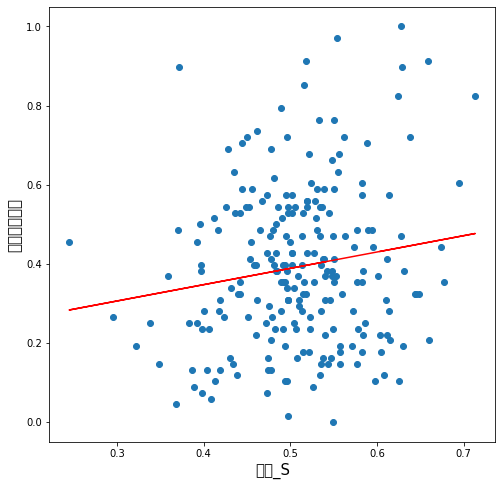

In [43]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['최종_S'],df['우울증유병률']) ## 원 데이터 산포도
plt.plot(df['최종_S'],model.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('최종_S', fontsize=font_size)
plt.ylabel('우울증유병률',fontsize=font_size)
plt.show()